## UFC Fight Data: Predicition Model

Dataset sourced from: http://www.datasets.co/dataset/All-UFC-Fights

By Karan Kathayat & Siddhartha Vale

#### Import Dataset

In [1]:
import pandas as pd
fighter_db = pd.read_csv('cleanData.csv')

#### EDA

In [2]:
fighter_db.head()

,Events,Favourite,Underdog,Label,REACH_delta,SLPM_delta,SAPM_delta,STRA_delta,STRD_delta,TD_delta,TDA_delta,TDD_delta,SUBA_delta,Odds_delta,Sum_delta
0,UFC 159 - Jones vs. Sonnen,Jon Jones,Chael Sonnen,Favourite,10,1.17,0.90,0.12,0.03,-1.56,-0.07,0.28,0.2,-7.87,2.60
1,UFC 159 - Jones vs. Sonnen,Leonard Garcia,Cody McKenzie,Underdog,-3,1.03,2.29,-0.10,-0.15,-2.20,0.01,0.28,-2.0,1.40,2.00
2,UFC Fight Night 34 - Saffiedine vs. Lim,Mairbek Taisumov,Tae Hyun Bang,Favourite,2,0.54,0.08,0.05,-0.05,1.75,0.44,0.28,-0.5,-2.89,5.04
3,UFC Fight Night 91 - McDonald vs. Lineker,Cody Pfister,Scott Holtzman,Underdog,4,-3.15,-0.85,-0.24,-0.06,0.55,-0.27,-0.58,-0.4,6.89,-0.86
4,UFC Fight Night 91 - McDonald vs. Lineker,Matthew Lopez,Rani Yahya,Underdog,2,0.02,0.86,0.13,-0.06,-0.08,0.51,0.37,-0.5,0.81,3.18


In [3]:
fighter_db.tail()

,Events,Favourite,Underdog,Label,REACH_delta,SLPM_delta,SAPM_delta,STRA_delta,STRD_delta,TD_delta,TDA_delta,TDD_delta,SUBA_delta,Odds_delta,Sum_delta
1310,UFC Fight Night 91 - McDonald vs. Lineker,Aleksei Oleinik,Daniel Omielanczuk,Underdog,6,-1.43,-0.58,-0.18,-0.01,2.53,0.17,-0.20,2.3,-1.22,6.26
1311,UFC Fight Night 91 - McDonald vs. Lineker,Kyle Noke,Keita Nakamura,Underdog,3,0.89,-1.46,0.13,0.07,-0.47,-0.01,0.04,0.3,-0.87,3.41
1312,UFC Fight Night 91 - McDonald vs. Lineker,Lauren Murphy,Katlyn Chookagian,Underdog,-1,-0.03,-0.02,0.13,-0.11,1.00,0.25,0.11,0.0,-1.14,4.96
1313,UFC Fight Night 91 - McDonald vs. Lineker,Sam Alvey,Eric Spicely,Favourite,2,1.68,2.21,-0.19,-0.02,-3.79,-0.22,0.85,-3.6,-2.07,-1.04
1314,UFC Fight Night 91 - McDonald vs. Lineker,Cristina Stanciu,Cortney Casey,Underdog,-3,-1.97,-0.82,0.10,0.02,0.40,0.34,0.18,1.5,0.72,4.04


In [4]:
fighter_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 15 columns):
Events         1315 non-null object
Favourite      1315 non-null object
Underdog       1315 non-null object
Label          1315 non-null object
REACH_delta    1315 non-null int64
SLPM_delta     1315 non-null float64
SAPM_delta     1315 non-null float64
STRA_delta     1315 non-null float64
STRD_delta     1315 non-null float64
TD_delta       1315 non-null float64
TDA_delta      1315 non-null float64
TDD_delta      1315 non-null float64
SUBA_delta     1315 non-null float64
Odds_delta     1315 non-null float64
Sum_delta      1315 non-null float64
dtypes: float64(10), int64(1), object(4)
memory usage: 154.2+ KB


In [5]:
fighter_db.mean(axis=0)

REACH_delta    0.219011
SLPM_delta     0.264205
SAPM_delta    -0.302084
STRA_delta     0.013338
STRD_delta     0.017886
TD_delta       0.280897
TDA_delta      0.052259
TDD_delta      0.055749
SUBA_delta     0.103194
Odds_delta    -0.859810
Sum_delta      4.133087
dtype: float64

In [6]:
fighter_db.shape

(1315, 15)

In [7]:
fighter_db.describe

<bound method NDFrame.describe of                                           Events             Favourite  \
0                     UFC 159 - Jones vs. Sonnen             Jon Jones   
1                     UFC 159 - Jones vs. Sonnen        Leonard Garcia   
2        UFC Fight Night 34 - Saffiedine vs. Lim      Mairbek Taisumov   
3      UFC Fight Night 91 - McDonald vs. Lineker          Cody Pfister   
4      UFC Fight Night 91 - McDonald vs. Lineker         Matthew Lopez   
5            UFC on Fox 20 - Holm vs. Shevchenko            Holly Holm   
6            UFC on Fox 20 - Holm vs. Shevchenko         Edson Barboza   
7            UFC on Fox 20 - Holm vs. Shevchenko      Bojan Mihajlovic   
8            UFC on Fox 20 - Holm vs. Shevchenko         Kailin Curran   
9            UFC on Fox 20 - Holm vs. Shevchenko         Frankie Saenz   
10           UFC on Fox 20 - Holm vs. Shevchenko         Darren Elkins   
11           UFC on Fox 20 - Holm vs. Shevchenko    Alexander Yakovlev   
12  

#### Acronyms Explained

- Label - This is the response variable. Either Favourite or Underdog will win
- REACH - Fighter's reach
- SLPM - Significant Strikes Landed per Minute
- STRA. - Significant Striking Accuracy
- SAPM - Significant Strikes Absorbed per Minute
- STRD - Significant Strike Defence (the % of opponents strikes that did not land)
- TD - Average Takedowns Landed per 15 minutes
- TDA - Takedown Accuracy
- TDD - Takedown Defense (the % of opponents TD attempts that did not land)
- SUBA - Average Submissions Attempted per 15 minutes
- Odds - Fighter's decimal odds spread for that specific matchup

#### Import Libraries

In [8]:
# Basic Libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import scipy.stats as stats

# Sklearn Packages for Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_val_predict
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score, classification_report, make_scorer, accuracy_score

import warnings
import time
warnings.filterwarnings('ignore')
%matplotlib inline

#### Data Preperation

In [9]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [10]:
def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [11]:
fighter_db.shape

(1315, 15)

In [12]:
import missingno as msno

#### Missing Data Visualization & Data Descibe

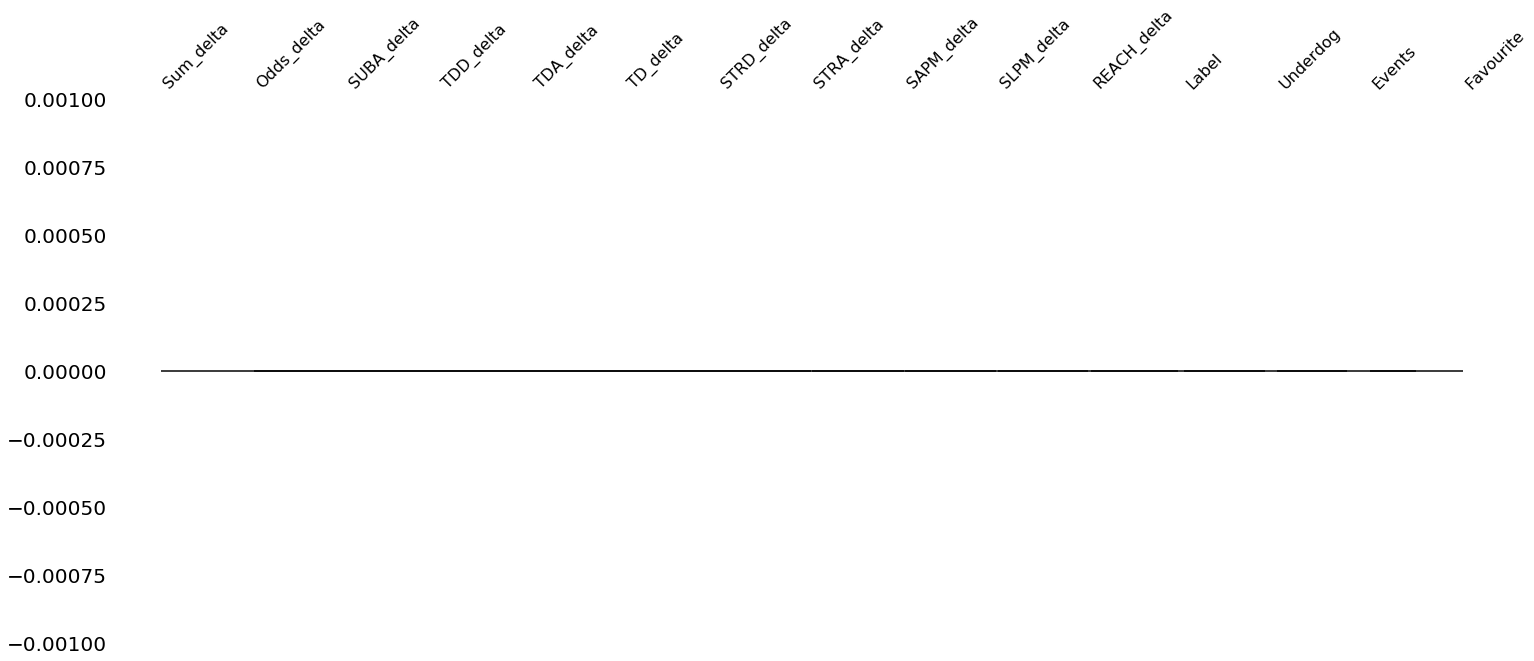

In [13]:
msno.dendrogram(fighter_db) #Check for missing numbers

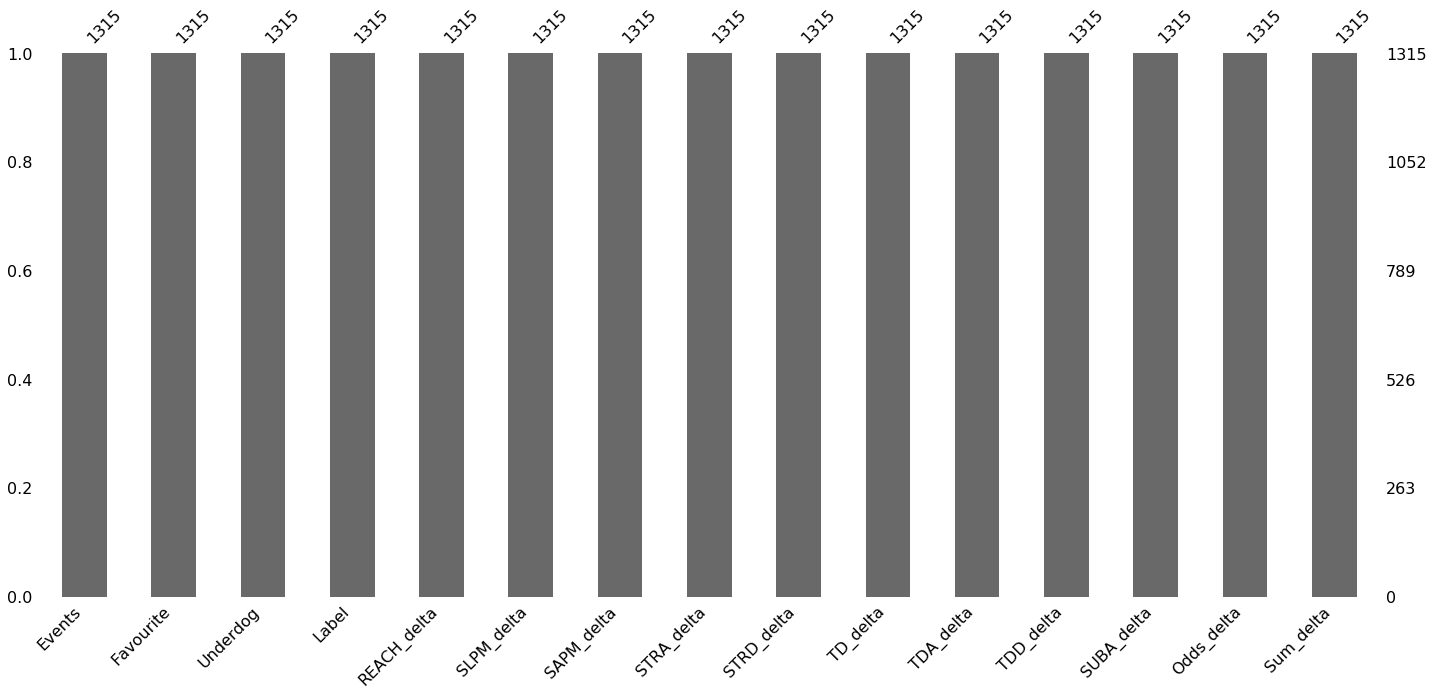

In [14]:
msno.bar(fighter_db)

In [15]:
fighter_db.dtypes #Data types of columns

Events          object
Favourite       object
Underdog        object
Label           object
REACH_delta      int64
SLPM_delta     float64
SAPM_delta     float64
STRA_delta     float64
STRD_delta     float64
TD_delta       float64
TDA_delta      float64
TDD_delta      float64
SUBA_delta     float64
Odds_delta     float64
Sum_delta      float64
dtype: object

In [16]:
fighter_db['Label'].value_counts() #Favourite and Underdog win count

Favourite    825
Underdog     490
Name: Label, dtype: int64

In [17]:
Favourite_win_percent = fighter_db['Label'].value_counts()/len(fighter_db)
Favourite_win_percent

Favourite    0.627376
Underdog     0.372624
Name: Label, dtype: float64

Favourite Fighters have a 62.73 win rate which shows that if you consistently bet on favourites, you will win 63 times out of 100

In [18]:
df = fighter_db

In [19]:
df

,Events,Favourite,Underdog,Label,REACH_delta,SLPM_delta,SAPM_delta,STRA_delta,STRD_delta,TD_delta,TDA_delta,TDD_delta,SUBA_delta,Odds_delta,Sum_delta
0,UFC 159 - Jones vs. Sonnen,Jon Jones,Chael Sonnen,Favourite,10,1.17,0.90,0.12,0.03,-1.56,-0.07,0.28,0.2,-7.87,2.60
1,UFC 159 - Jones vs. Sonnen,Leonard Garcia,Cody McKenzie,Underdog,-3,1.03,2.29,-0.10,-0.15,-2.20,0.01,0.28,-2.0,1.40,2.00
2,UFC Fight Night 34 - Saffiedine vs. Lim,Mairbek Taisumov,Tae Hyun Bang,Favourite,2,0.54,0.08,0.05,-0.05,1.75,0.44,0.28,-0.5,-2.89,5.04
3,UFC Fight Night 91 - McDonald vs. Lineker,Cody Pfister,Scott Holtzman,Underdog,4,-3.15,-0.85,-0.24,-0.06,0.55,-0.27,-0.58,-0.4,6.89,-0.86
4,UFC Fight Night 91 - McDonald vs. Lineker,Matthew Lopez,Rani Yahya,Underdog,2,0.02,0.86,0.13,-0.06,-0.08,0.51,0.37,-0.5,0.81,3.18
5,UFC on Fox 20 - Holm vs. Shevchenko,Holly Holm,Valentina Shevchenko,Underdog,2,0.60,0.37,-0.17,-0.01,-2.06,-0.34,0.05,-0.2,-1.75,1.03
6,UFC on Fox 20 - Holm vs. Shevchenko,Edson Barboza,Gilbert Melendez,Favourite,2,0.39,1.36,0.08,-0.01,-1.19,0.11,0.15,-0.1,-1.27,3.30
7,UFC on Fox 20 - Holm vs. Shevchenko,Bojan Mihajlovic,Francis Ngannou,Underdog,-10,-1.57,2.06,-0.06,-0.02,0.00,0.00,0.27,-0.7,0.71,1.98
8,UFC on Fox 20 - Holm vs. Shevchenko,Kailin Curran,Felice Herrig,Underdog,0,0.76,0.18,0.09,0.01,0.79,0.40,0.17,-1.0,0.05,5.61
9,UFC on Fox 20 - Holm vs. Shevchenko,Frankie Saenz,Eddie Wineland,Underdog,-3,0.73,-0.29,0.16,-0.18,1.41,0.00,-0.16,0.0,0.72,5.35


#### Data Visualization

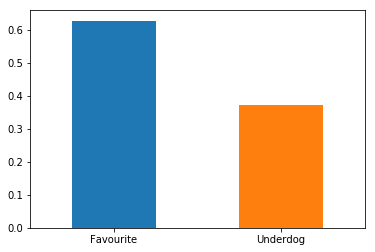

In [20]:
Favourite_win_percent.plot(kind='bar', rot=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113fc3668>,
      dtype=object)

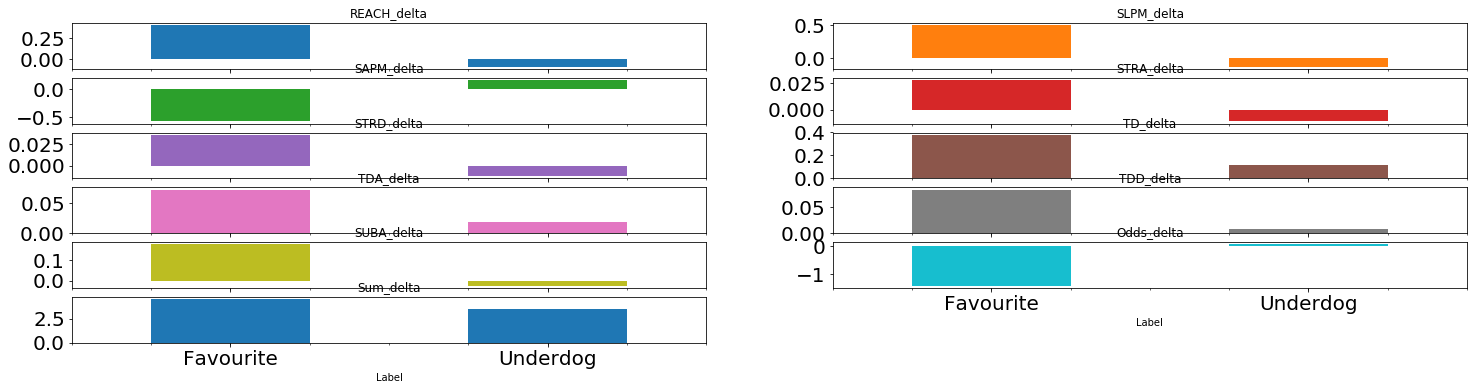

In [21]:
# Does mean of each feature distinguish the Favourite / Underdog to win ?
# Does a specific feature advantage give the underdog winners an edge ?
df.groupby('Label').mean().plot(kind = 'bar', subplots=True, layout=(20,2), legend=False, figsize=(25,20), fontsize=20, rot=0)

Help sourced from: https://pythonspot.com/matplotlib-bar-chart/ and
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

In [22]:
def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column
    Usage
    ------
    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

# Correlation Matrix
df_corr = create_dummies(df, 'Label').drop('Label_Underdog', axis = 1)
corr = df_corr.corr()
corr = (corr)
corr

,REACH_delta,SLPM_delta,SAPM_delta,STRA_delta,STRD_delta,TD_delta,TDA_delta,TDD_delta,SUBA_delta,Odds_delta,Sum_delta,Label_Favourite
REACH_delta,1.000000,0.037076,-0.077292,-0.042400,-0.090796,-0.078721,0.027693,-0.072749,0.060381,-0.030485,-0.044349,0.070252
SLPM_delta,0.037076,1.000000,0.089550,0.361854,0.268306,-0.167199,0.041915,0.195507,-0.167117,-0.154969,0.422291,0.205441
SAPM_delta,-0.077292,0.089550,1.000000,-0.298355,-0.412943,-0.280762,-0.230730,-0.064397,-0.040124,0.148382,-0.006268,-0.226802
STRA_delta,-0.042400,0.361854,-0.298355,1.000000,0.114704,0.202333,0.246022,0.143988,0.038443,-0.103734,0.356671,0.168435
STRD_delta,-0.090796,0.268306,-0.412943,0.114704,1.000000,0.043988,0.128065,0.188816,-0.153664,-0.111798,0.094411,0.220450
TD_delta,-0.078721,-0.167199,-0.280762,0.202333,0.043988,1.000000,0.427436,0.003178,0.192474,-0.072800,0.635365,0.067313
TDA_delta,0.027693,0.041915,-0.230730,0.246022,0.128065,0.427436,1.000000,0.221375,0.098257,-0.106092,0.454456,0.091885
TDD_delta,-0.072749,0.195507,-0.064397,0.143988,0.188816,0.003178,0.221375,1.000000,-0.157317,-0.101961,0.183764,0.123448
SUBA_delta,0.060381,-0.167117,-0.040124,0.038443,-0.153664,0.192474,0.098257,-0.157317,1.000000,-0.047820,0.441608,0.085332
Odds_delta,-0.030485,-0.154969,0.148382,-0.103734,-0.111798,-0.072800,-0.106092,-0.101961,-0.047820,1.000000,-0.155038,-0.306930


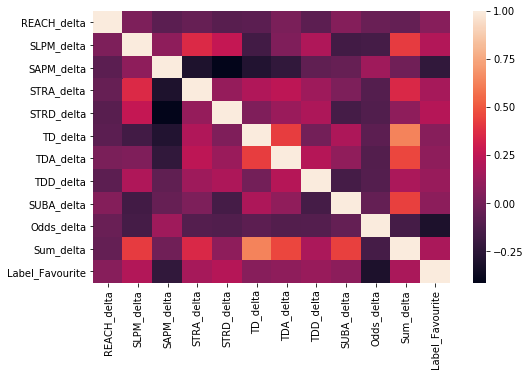

In [26]:
#HeatMap
plt.figure(figsize=(8,5))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [27]:
# Comparing both means

print('STRD_delta mean of favourite winners is: ' +  '{}' .format(df['STRD_delta'][df['Label'] == 'Favourite'].mean()))
print('STRD_delta mean of undersog winners is: ' + '{}'.format(df['STRD_delta'][df['Label'] == 'Underdog'].mean()))

# However, is the marginal difference of 0.047 significant?From the correlation matrix, we know that:

STRD_delta mean of favourite winners is: 0.03570909090909091
STRD_delta mean of undersog winners is: -0.012122448979591837


From the correlation matrix, we know that:

Predictors are not too correlated with each other. Low possibility of multicollinearity. Not too much of a worry if regression is applied.
Positive correlation to strikes landed, striking defense to make a favourite more favourable to win

In [28]:
# T-test
stats.ttest_1samp(a=  df[df['Label']=='Favourite']['STRD_delta'], # Sample of Favourite winners
                  popmean = df['STRD_delta'].mean())  # Fighter population mean

Ttest_1sampResult(statistic=4.987525562089511, pvalue=7.459987627406486e-07)

In [29]:
# Critical point 
degree_freedom = len(df[df['Label']=='Favourite'])

# Left Quartile - Lower Quartile
LQ = stats.t.ppf(0.025,degree_freedom)

# Right Quartile - Upper Quartile
RQ = stats.t.ppf(0.975,degree_freedom)

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.962843616296083
The t-distribution right quartile range is: 1.9628436162960825


In [30]:
cols = df.drop(['Events', 'Favourite', 'Underdog', 'Label'], axis =1).columns.tolist()

IndexError: index 2 is out of bounds for axis 0 with size 2

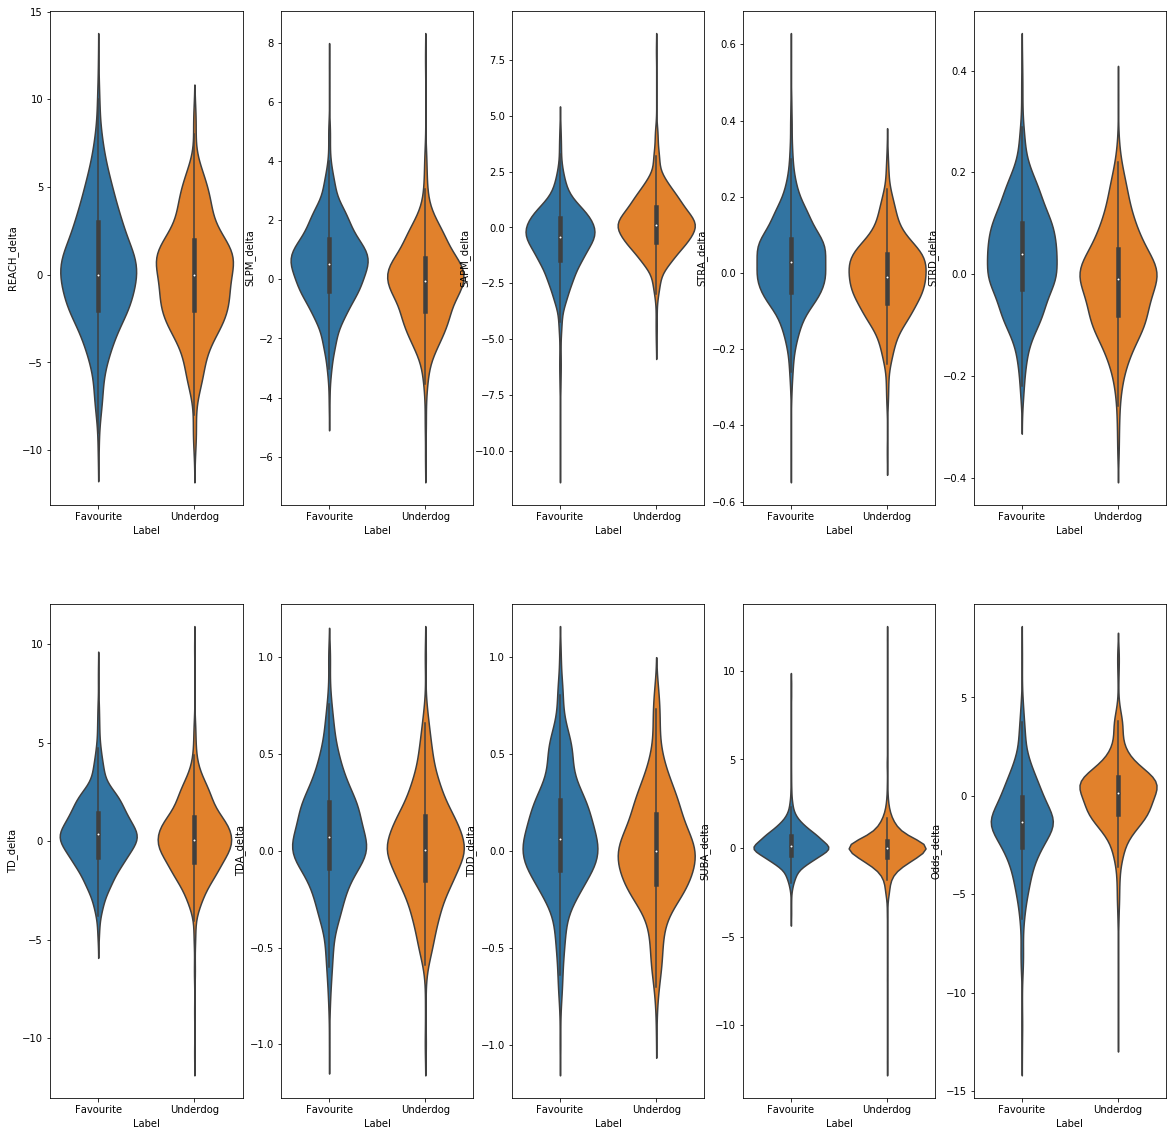

In [31]:
# create 10 plots with a 2 by 5 dimension subplots
fig, ax = plt.subplots(2,5, figsize=(20,20))

# loop to plot in subplots
for i, col in enumerate(cols):
    x = i // 5
    y = i % 5
    sns.violinplot(x="Label", y=col , data=df, order=["Favourite", "Underdog"], ax=ax[x,y])

Guidance for violin plots from: https://matplotlib.org/gallery/statistics/violinplot.html

Feature Selection
Feature selection is the process of selecting a subset of relevant predictors for use in model construction. Feature selection is used for:

simplification of models to make them easier to interpret
shorter training times (applicable to very huge datasets)
to avoid the curse of dimensionality
enhanced generalization by reducing overfitting (reduction of variance)
From RFECV and Feature Importance as validation, we know:

The 4 most important features are SAPM_delta, SLPM_delta, STRD_delta, TD_delta, Odds_delta

## Recursive Feature Elimination with Cross Validation
The features will be selected based on Recursive Feature Elimination with Cross Validation (RFECV). Recursive Feature Elimination (RFE) works by training the model, evaluating it, then removing the least significant features, and repeating.

In [32]:
# Select features function
# Note: feature names are stored in cols

def select_features(df):
    all_X = df.drop(['Events', 'Favourite', 'Underdog', 'Label'], axis=1)
    all_y = df['Label']
    
    clf = RandomForestClassifier(random_state=1)
    selector = RFECV(clf)
    selector.fit(all_X, all_y)
    best_columns = list(all_X.columns[selector.support_])
    print('Best Columns \n' + '-'*12 + '\n' + '{}'.format(best_columns))
    
    return best_columns

In [33]:
best_cols = select_features(df)

Best Columns 
------------
['SLPM_delta', 'SAPM_delta', 'STRA_delta', 'STRD_delta', 'TD_delta', 'TDD_delta', 'Odds_delta', 'Sum_delta']


## Feature Importance
As expected Reach_delta is of least importance since reach does not really determine a clear winner

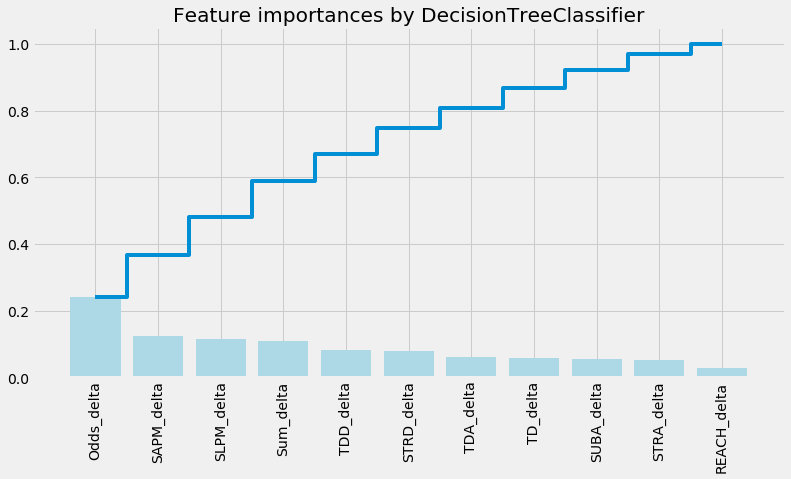

In [34]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Create train and test splits
target_name = 'Label'
X = df.drop(['Events', 'Favourite', 'Underdog', 'Label'], axis=1)
y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=1, stratify=y)

dtree = RandomForestClassifier(
    #max_depth=3,
    random_state = 1,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['Events', 'Favourite', 'Underdog', 'Label'], axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Guidance on 538 plots found on: https://www.dataquest.io/blog/making-538-plots/
and decsiontreeclassifier guilde on: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Model Selection and Hyperparameter Tuning

Model selection and hyperparameter tuning were accomplish using GridSearchCV. There is no need to apply train_test_split in this case due to the Cross Validation embedded in GridSearchCV

Among the models considered are:
- Logistic Regression
- Random Forest Classifier
- Neural Network (MLP)

In [35]:
def select_model(df, features): 
    all_X = df[features]
    all_y = df["Label"]
    #create a list of dics which contains models and hyperparameters
    models = [
        {
            "name": "Logistic Regression",
            "estimator": LogisticRegression(),
            "hyperparameters":
            {
             "solver": ["newton-cg", "lbfgs", "liblinear"]   
            }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]
                }
        },
                {
            "name": "Multi Layer Perceptron (MLP)",
            "estimator": MLPClassifier(random_state=1),
            "hyperparameters":
                {
                    "hidden_layer_sizes": [(5,5), (10,10)],
                    "activation": ["relu", "tanh", "logistic"],
                    "solver": ['sgd', 'adam'],
                    "learning_rate": ["constant", "adaptive"]
                }
        }   
    ]
    for model in log_progress(models):
        print(model["name"])
        print("-"*len(model["name"]))
        
        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10, scoring = 'accuracy')
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_
        model["scoring"] = grid.scorer_
        
        print("Best Paramerters:\n" + "{}".format(model["best_params"]))
        print("Best Score:\n" + "{}".format(model["best_score"]))
        print("Best Model:\n" + "{}\n".format(model["best_model"]))
        print("Scoring method:\n" + "{}\n".format(model["scoring"]))
    return models

- Solver: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- Netwon-cg: https://docs.scipy.org/doc/scipy/reference/optimize.minimize-newtoncg.html
- LBFGS: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fmin_l_bfgs_b.html
- Liblinear: https://github.com/cjlin1/liblinear
- Neural Networks (MLP): https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [34]:
models = select_model(df, best_cols)

Logistic Regression
-------------------
Best Paramerters:
{'solver': 'newton-cg'}
Best Score:
0.6927756653992395
Best Model:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

Scoring method:
make_scorer(accuracy_score)

RandomForestClassifier
----------------------
Best Paramerters:
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 4}
Best Score:
0.6988593155893537
Best Model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=

# Final Model Verdict

- Logistic Regression gives us an accuracy of 69.89%
- Random Forest gives us an accuracy of 69.89%

While
- **Neural Network (MLP) gives us best accuracy of 70.27%**

# Conclusion

Neural Network (MLP) gives the highest score. Note that not too many hidden layers was chosen due to efficiency and also potential overfitting. The final model selected, Neural Network (MLP) to predict winners from Favourite and Underdog has an accuracy of 70.4%. This project successfully satisfied the crucial objective which was to achieve an accuracy of more than 50%.

# Improvements

1) The sport of MMA having it's inception in 1993, is very young as compared to boxing and with an increase in number of fights, there will be more data and more complete data for us to work with.

2) To include the coaching 'camp' for each fighter.

3) Better structured odds.

4) Improve data quality.

5) Updating data on interval basis to omit retired fighters.

6) Social Media Analytics